# importing libraries and data

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [102]:
df = pd.read_csv('18-05jobsInfo.csv')
df.head()

,Unnamed: 0,crawl_date,crawl_url,adsAge,jobs,Vollzeit,Festanstellung,Teilzeit,Befristet,Minijob,...,español,Dresden,français,Português,Nürnberg,Halle (Saale),Duisburg,Polski,Essen,italiano;;
0,0,05/18/2020;11:43;,https://de.indeed.com/Jobs?as_and=&as_phr=&as_...,1,6743,1454,667,623,73,72,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,05/18/2020;11:43;,https://de.indeed.com/Jobs?as_and=&as_phr=&as_...,2,8413,1953,1001,951,111,108,...,NaN,87.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,05/18/2020;11:43;,https://de.indeed.com/Jobs?as_and=&as_phr=&as_...,3,22413,6374,2397,2879,447,363,...,NaN,273.0,5.0,NaN,316.0,300.0,224.0,6.0,NaN,NaN
3,3,05/18/2020;11:43;,https://de.indeed.com/Jobs?as_and=&as_phr=&as_...,4,33101,10111,3755,4748,855,625,...,NaN,425.0,13.0,NaN,426.0,341.0,NaN,NaN,308.0,14.0
4,4,05/18/2020;11:43;,https://de.indeed.com/Jobs?as_and=&as_phr=&as_...,5,42794,13468,5064,6326,1129,848,...,NaN,558.0,17.0,NaN,553.0,NaN,NaN,NaN,397.0,14.0


# structure the data

In [103]:
df.drop(columns=['Unnamed: 0', 'crawl_date', 'crawl_url'], inplace = True)
df.set_index('adsAge', inplace = True)
df.head()
df = df.fillna(0)

In [104]:
languages = ['Deutsch', 'English', 'Nederlands', 'čeština', 'español', 'français', 'Português', 'Polski', 'italiano;;']
cities = ['Berlin', 'München', 'Hamburg', 'Hannover', 'Mannheim', 'Frankfurt am Main', 'Düsseldorf', 'Köln', 'Bonn', 'Stuttgart', 'Braunschweig', 'Bremen', 'Leipzig', 'Dortmund', 'Oranienburg', 'Dresden', 'Halle (Saale)', 'Duisburg', 'Essen', 'Nürnberg']
jobtype = ['jobs', 'Vollzeit', 'Festanstellung', 'Teilzeit', 'Befristet', 'Minijob', 'Freie Mitarbeit', 'Ausbildung', 'Praktikum', 'Werkvertrag', 'Auf Kommission']

df[languages] = df[languages].astype('int64')
df[cities] = df[cities].astype('int64')
df[jobtype] = df[jobtype].astype('int64')

dflanguages = df[languages]
dfcities = df[cities]
dfjobtype = df[jobtype]
dfcompanies = df.drop(columns=df[languages + cities + jobtype])

# data analysis

#### average number of jobs posted per day and city

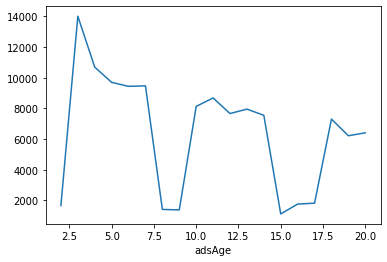

The average number of jobs posted per day is 6440.578947368421


In [105]:
df['jobs'].diff().plot() # amount of jobs posted between 'adsAge' and 'adsAge minus 1' days ago
plt.show()
avg_jobs = df['jobs'].diff().sum() / (df.index.max() - 1) # calculates the average number of jobs posted per day
print('The average number of jobs posted per day is', avg_jobs)

Berlin               384.473684
München              271.894737
Hamburg              274.210526
Hannover              78.526316
Mannheim              51.894737
Frankfurt am Main    126.315789
Düsseldorf           105.052632
Köln                 131.684211
Bonn                  -4.368421
Stuttgart             93.789474
Braunschweig          -3.894737
Bremen                76.631579
Leipzig               79.789474
Dortmund              -3.631579
Oranienburg           -3.578947
Dresden               89.684211
Halle (Saale)          0.000000
Duisburg               0.000000
Essen                 60.894737
Nürnberg              90.473684
dtype: float64

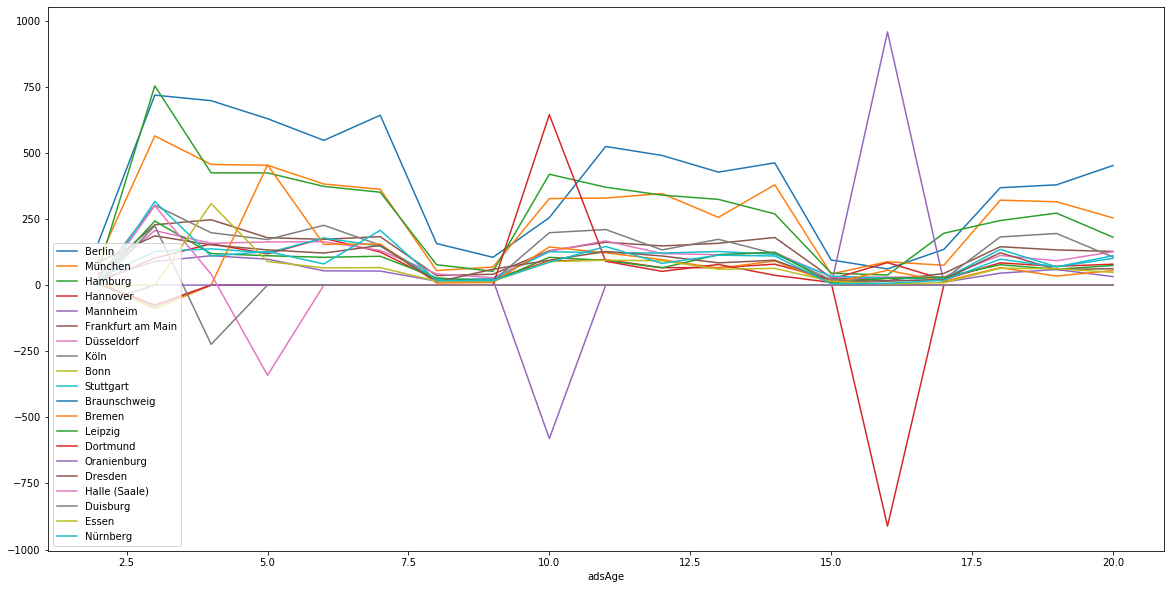

In [106]:
dfcities.diff().plot(figsize=(20,10)) # amount of jobs posted between 'adsAge' and 'adsAge minus 1' days ago per city
dfcities.diff().sum() / (df.index.max() - 1) # calculates the average number of jobs posted per day per city

#### trend lines for fulltime and parttime jobs

C:\Users\lukas\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


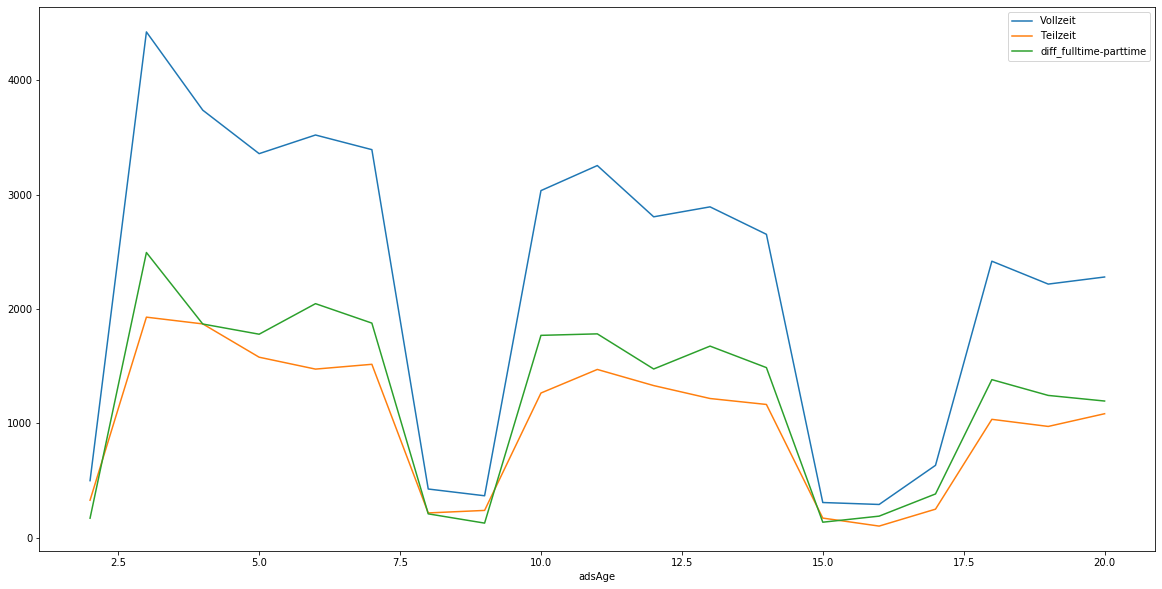

In [114]:
dfjobtype['diff_fulltime-parttime'] = dfjobtype['Vollzeit'] - dfjobtype['Teilzeit'] # calculates the difference between the amount of fulltime and parttime jobs (the aim is to see, whether the ratio between parttime and fulltime jobs is increasing or deacreasing)
dfjobtype[['Vollzeit', 'Teilzeit', 'diff_fulltime-parttime']].diff().plot(figsize=(20,10))

#### show trend of overall job posting activity plus barplot with total numbers

#### percentage yesterday's posts vs earliest date

#### highlight companies with high hiring activities

#### show the number of remote jobs or show the more detailed analysis of remote jobs (%15 increase in remote data scientist jobs etc.)

#### show which types of job are most in demand

#### highlight cities with high hiring activities